In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter('ignore')

2024-02-09 13:09:42.777541: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-09 13:09:42.809081: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-09 13:09:42.809104: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-09 13:09:42.809896: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-09 13:09:42.814432: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-09 13:09:42.815223: I tensorflow/core/platform/cpu_feature_guard.cc:1

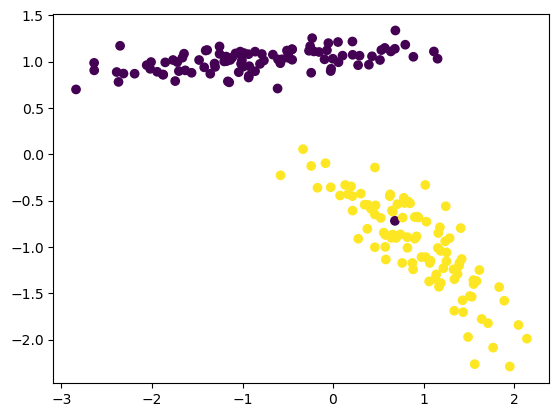

In [2]:
m = 200
X, y = datasets.make_classification(n_samples=m,
                                    n_features=2,
                                    n_informative=2,
                                    n_redundant=0,
                                    n_repeated=0,
                                    n_classes=2,
                                    n_clusters_per_class=1)
plt.scatter(X[:,0], X[:,1], c=y, marker='o');

y = y.reshape(-1,1)

n_inputs = X.shape[1]
n_outputs = 1
learning_rate = 0.01
n_epochs = 500

In [3]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [4]:
print(x_train.shape, y_train.shape)

(140, 2) (140, 1)


In [5]:
tf.compat.v1.disable_eager_execution()
x_p = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None,n_inputs], name='x_p')
y_p = tf.compat.v1.placeholder(dtype=tf.float32, shape=[None,1], name='y_p')
print(x_p.shape, y_p.shape)

weights = tf.Variable(tf.zeros(shape=(n_inputs,n_outputs)), name='weights')
bias = tf.Variable(tf.zeros((n_outputs)), name='bias')
print(weights.shape, bias.shape)

(None, 2) (None, 1)
(2, 1) (1,)


In [6]:
z = tf.matmul(x_p, weights) + bias
model = tf.sigmoid(z)
print(model.shape)

(None, 1)


In [7]:
loss_op = -tf.reduce_mean(y_p*tf.compat.v1.log(model) + (1-y_p)*tf.compat.v1.log(1-model), name='loss')
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss_op)

In [8]:
check_prediction = tf.equal(tf.round(model), y_p)
accuracy_op = tf.reduce_mean(tf.cast(check_prediction, tf.float32)) * 100

In [9]:
init = tf.compat.v1.global_variables_initializer()

In [10]:
with tf.compat.v1.Session() as sess:
    sess.run(init)
    loss_values = []
    for epoch in range(n_epochs):
        loss_value, accuracy_value,_=sess.run([loss_op, accuracy_op, optimizer], feed_dict={x_p: x_train, y_p: y_train})
        loss_values.append(loss_value)
        print(f'loss value:{loss_value}, accuracy: {accuracy_value}')
    weight_value,bias_value = sess.run([weights,bias])

2024-02-09 13:09:45.475992: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-09 13:09:45.479681: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-02-09 13:09:45.485498: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled


loss value:0.6931472420692444, accuracy: 52.142860412597656
loss value:0.6885100603103638, accuracy: 98.57142639160156
loss value:0.6839266419410706, accuracy: 98.57142639160156
loss value:0.6793965101242065, accuracy: 98.57142639160156
loss value:0.6749188303947449, accuracy: 98.57142639160156
loss value:0.6704931259155273, accuracy: 98.57142639160156
loss value:0.6661186218261719, accuracy: 98.57142639160156
loss value:0.6617947816848755, accuracy: 98.57142639160156
loss value:0.6575210690498352, accuracy: 98.57142639160156
loss value:0.6532965898513794, accuracy: 98.57142639160156
loss value:0.649121105670929, accuracy: 98.57142639160156
loss value:0.6449936628341675, accuracy: 98.57142639160156
loss value:0.6409138441085815, accuracy: 98.57142639160156
loss value:0.6368809938430786, accuracy: 98.57142639160156
loss value:0.6328946352005005, accuracy: 98.57142639160156
loss value:0.6289539933204651, accuracy: 98.57142639160156
loss value:0.6250587105751038, accuracy: 98.571426391601

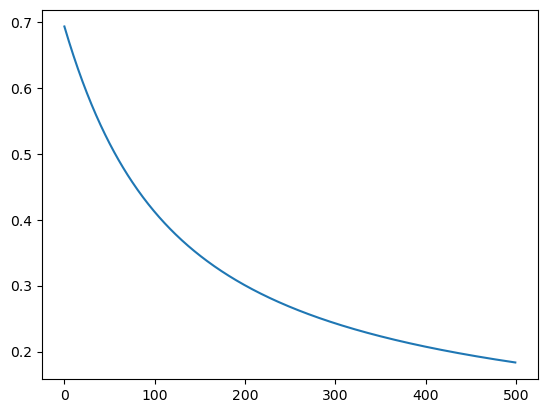

In [11]:
plt.plot(loss_values)
plt.show();

In [12]:
w1, w2 = weight_value

In [13]:
b = bias_value[0]

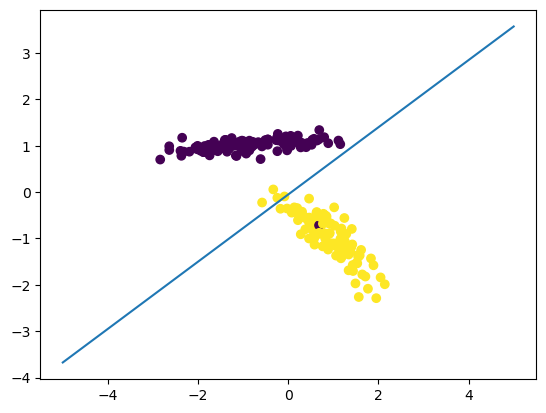

In [14]:
x1 = np.linspace(-5, 5, 200)
x2 = -(w1*x1+b)/w2
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y.reshape(-1,), marker='o');
plt.plot(x1, x2);